# Lab 05. Regression and Clustering


In this lab we will tackle two types of tasks: 
- Regression Competition
- Clustering practice


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab05_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab05_404_Sheipak_Sviat.ipynb`
    - `2022_lab05_M106_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab05_GroupNumber_Surname_Name`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2022-12-08 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/gqo8GmBMUBfRuw

## Part 1. Regression [7 points]

The task is to predict a price of a house sold in California based on some description of a house. Some columns give some information on the house itself (number of bedrooms, short written summary and so on) and some describe the neighborhood (middleschoolscore, middleschooldistance).

* Id column - `id`
* Target column - `sold_price`
* Scoring is `RMSE` - root mean squared error

In [29]:
import numpy as np
import pandas as pd

In [30]:
df_train = pd.read_csv("housing_train.csv")
df_test = pd.read_csv("housing_test.csv")

In [31]:
numeric_cols = ['bathrooms', 'full_bathrooms', 'total_interior_livable_area', 'total_spaces', 'garage_spaces', 
                'elementary_school_score', 'elementary_school_distance', 'middle_school_score', 'middle_school_distance', 
                'high_school_score', 'high_school_distance', 'tax_assessed_value', 'listed_price', 
                'last_sold_price', 'year_built', 'annual_tax_amount']

cat_cols = ['type', 'heating', 'cooling', 'parking', 'bedrooms', 'region',
            'elementary_school', 'middle_school', 'high_school', 'flooring', 
            'heating_features', 'cooling_features', 'appliances_included', 
            'laundry_features', 'parking_features', 'city', 'zip', 'state', 'listed_on', 'last_sold_on']

text_cols = ['address', 'summary',]
target_cols = ['sold_price']
id_cols = ['id']

In [32]:
train_num_df = df_train[numeric_cols].fillna(df_train[numeric_cols].mean(axis=0))
test_num_df = df_test[numeric_cols].fillna(df_test[numeric_cols].mean(axis=0))

In [33]:
X_train_nf, Y_train_nf = train_num_df.values, df_train[target_cols].values
X_test_nf, Y_test_nf = test_num_df.values, df_test[target_cols].values

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [35]:
lr_grid = {
    "alpha": np.logspace(-5, 3, 100)
}

lr_grid_searcher = GridSearchCV(Ridge(), lr_grid, cv=5, return_train_score=True, scoring="neg_root_mean_squared_error")
lr_grid_searcher.fit(X_train_nf, Y_train_nf)
lr_grid_searcher.best_estimator_,lr_grid_searcher.best_score_

(Ridge(alpha=1e-05), -0.2507606091997061)

In [36]:
best_model = lr_grid_searcher.best_estimator_
best_model.fit(X_train_nf, Y_train_nf)

test_preds = best_model.predict(X_test_nf)
np.sqrt(mean_squared_error(Y_test_nf, test_preds))

0.2514677222697977

Get a score as low as possible:

Table ref:
```
Score < 0.25 - 1 points
Score < 0.24 - 2 points
Score < 0.22 - 3 points
Score < 0.21 - 5 points
Score < 0.20 - 6 points
Score < 0.18 - 7 points
```

Don't forget to use categorical and text features.

**Task 1.1** [7 points]

In [37]:
scaler = StandardScaler()

In [38]:
X_train_nf, Y_train_nf = scaler.fit_transform(train_num_df), df_train[target_cols].values
X_test_nf, Y_test_nf = scaler.fit_transform(test_num_df), df_test[target_cols].values

In [39]:
lr_grid = {
    "alpha": np.logspace(-5, 5, 100)
}

lr_grid_searcher = GridSearchCV(Lasso(), lr_grid, cv=5, return_train_score=True, scoring="neg_root_mean_squared_error")
lr_grid_searcher.fit(X_train_nf, Y_train_nf)
lr_grid_searcher.best_estimator_,lr_grid_searcher.best_score_

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+00, tolerance: 1.773e+00
  model = cd_fast.enet_coordinate_descent(


(Lasso(alpha=0.0026560877829466868), -0.2477184613092486)

In [40]:
best_model = lr_grid_searcher.best_estimator_
best_model.fit(X_train_nf, Y_train_nf)

test_preds = best_model.predict(X_test_nf)
np.sqrt(mean_squared_error(Y_test_nf, test_preds))

0.25179134808545994

In [41]:
best_model.coef_

array([ 4.03513929e-03,  2.88319817e-03,  2.23762442e-04, -0.00000000e+00,
       -0.00000000e+00,  1.61365945e-02, -1.16568208e-02,  5.40397927e-03,
       -0.00000000e+00,  8.19801691e-03, -1.69227202e-02,  2.34629298e-02,
        7.07418656e-01,  1.50472505e-02, -3.26808177e-03,  2.88482495e-03])

In [42]:
useful_indx = [i for i in range(len(best_model.coef_)) if best_model.coef_[i] != 0]
print([numeric_cols[i] for i in useful_indx])

['bathrooms', 'full_bathrooms', 'total_interior_livable_area', 'elementary_school_score', 'elementary_school_distance', 'middle_school_score', 'high_school_score', 'high_school_distance', 'tax_assessed_value', 'listed_price', 'last_sold_price', 'year_built', 'annual_tax_amount']


In [43]:
X_train_nf, Y_train_nf = X_train_nf[: , useful_indx], df_train[target_cols].values
X_test_nf, Y_test_nf = X_test_nf[: , useful_indx], df_test[target_cols].values

In [44]:
lr_grid = {
    "alpha": np.logspace(-5, 5, 100)
}

lr_grid_searcher = GridSearchCV(Lasso(), lr_grid, cv=5, return_train_score=True, scoring="neg_root_mean_squared_error")
lr_grid_searcher.fit(X_train_nf, Y_train_nf)
lr_grid_searcher.best_estimator_,lr_grid_searcher.best_score_

(Lasso(alpha=0.0026560877829466868), -0.24771837281505865)

In [45]:
best_model = lr_grid_searcher.best_estimator_
best_model.fit(X_train_nf, Y_train_nf)

test_preds = best_model.predict(X_test_nf)
np.sqrt(mean_squared_error(Y_test_nf, test_preds))

0.2517913479274089

Cat features

In [46]:
df_train.head(1)

address  sold_price  \
0  1536 Bacon St   13.915356   

                                             summary          type  \
0  Classic super clean 1955 mid century modern ho...  SingleFamily   

   year_built heating cooling                       parking bedrooms  \
0      1955.0     NaN     NaN  On Site (Single Family Only)        4   

   bathrooms  ...  tax_assessed_value  annual_tax_amount   listed_on  \
0        1.0  ...           13.647409            10920.0  2021-04-07   

   listed_price last_sold_on last_sold_price           city    zip state    id  
0     13.810498   2007-05-31       13.444447  San Francisco  94134    CA  9853  

[1 rows x 40 columns]

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_train)

OneHotEncoder(handle_unknown='ignore')

In [50]:
train_cat_df = enc.transform(df_train)
test_cat_df = enc.transform(df_test)

In [35]:
#train_cat_df = (pd.get_dummies(df_train[cat_cols]))
#test_cat_df = (pd.get_dummies(df_test[cat_cols]))

In [58]:
print((train_cat_df.toarray()).shape, (test_cat_df.toarray()).shape)

MemoryError: Unable to allocate 51.3 GiB for an array with shape (35000, 196890) and data type float64

In [25]:
train_cat_df = train_cat_df.fillna(train_cat_df.mode(axis=0))
test_cat_df = test_cat_df.fillna(test_cat_df.mode(axis=0))

In [27]:
X_train_cf, Y_train_cf = train_cat_df.values, df_train[target_cols].values
X_test_cf, Y_test_cf = test_cat_df.values, df_test[target_cols].values

In [29]:
lasso_clf = Lasso(alpha=0.1) 
lasso_clf.fit(X_train_cf, Y_train_cf)

ValueError: X has 8051 features, but Lasso is expecting 30602 features as input.

In [ ]:
np.sqrt(mean_squared_error(Y_test_cf, lasso_clf.predict(X_test_cf)))

## Part 2. Clustering [8 points]

In this part we will try to analyze a dump of leaked passwords of internet users. It can be accessed here: https://github.com/ignis-sec/Pwdb-Public/tree/master/wordlists

First kind reminder - if you see your password in this base, change it immediately.

In [2]:
words = []
with open("ignis-1M.txt", "r", encoding='utf-8') as file:
    for line in file:
        words.append(line.strip())

To make it more simple, we'll use only first 3K of passwords:

In [5]:
words = np.array(words[:3000]).reshape((-1, 1))

**Task 2.1 [0.5 point]**

Let's start with calculating levenshtein distance between words in the dataset. Compute a `3000x3000` distance matrix.

In [4]:
import numpy as np
from pylev import levenshtein
import matplotlib.pyplot as plt

In [6]:
X = np.zeros((words.shape[0], words.shape[0]))

for i in range(len(words)):
    for j in range(len(words)):
        X[i][j] = levenshtein(words[i][0], words[j][0])

In [7]:
print(levenshtein(words[1887][0], words[178][0]), words[1887][0], words[178][0])

6 aaron 131313


In [8]:
print(X)

[[ 0.  3.  8. ...  3.  9. 12.]
 [ 3.  0.  9. ...  6.  9. 12.]
 [ 8.  9.  0. ...  9.  7. 11.]
 ...
 [ 3.  6.  9. ...  0.  8. 12.]
 [ 9.  9.  7. ...  8.  0. 11.]
 [12. 12. 11. ... 12. 11.  0.]]


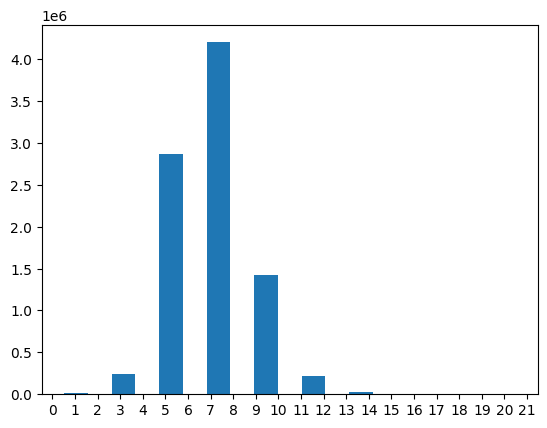

In [9]:
plt.hist(X.reshape(-1), rwidth=0.5)
plt.xticks(np.arange(0, X.max() + 1))
plt.show()

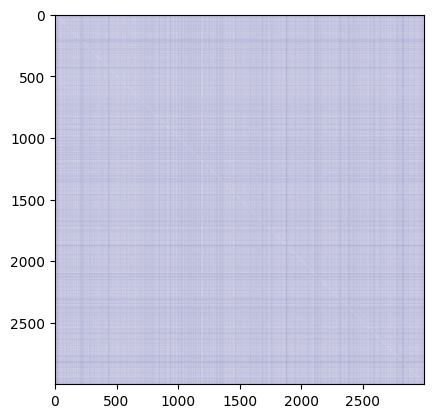

In [10]:
plt.imshow(X, cmap="Purples")
plt.show()

<AxesSubplot:>

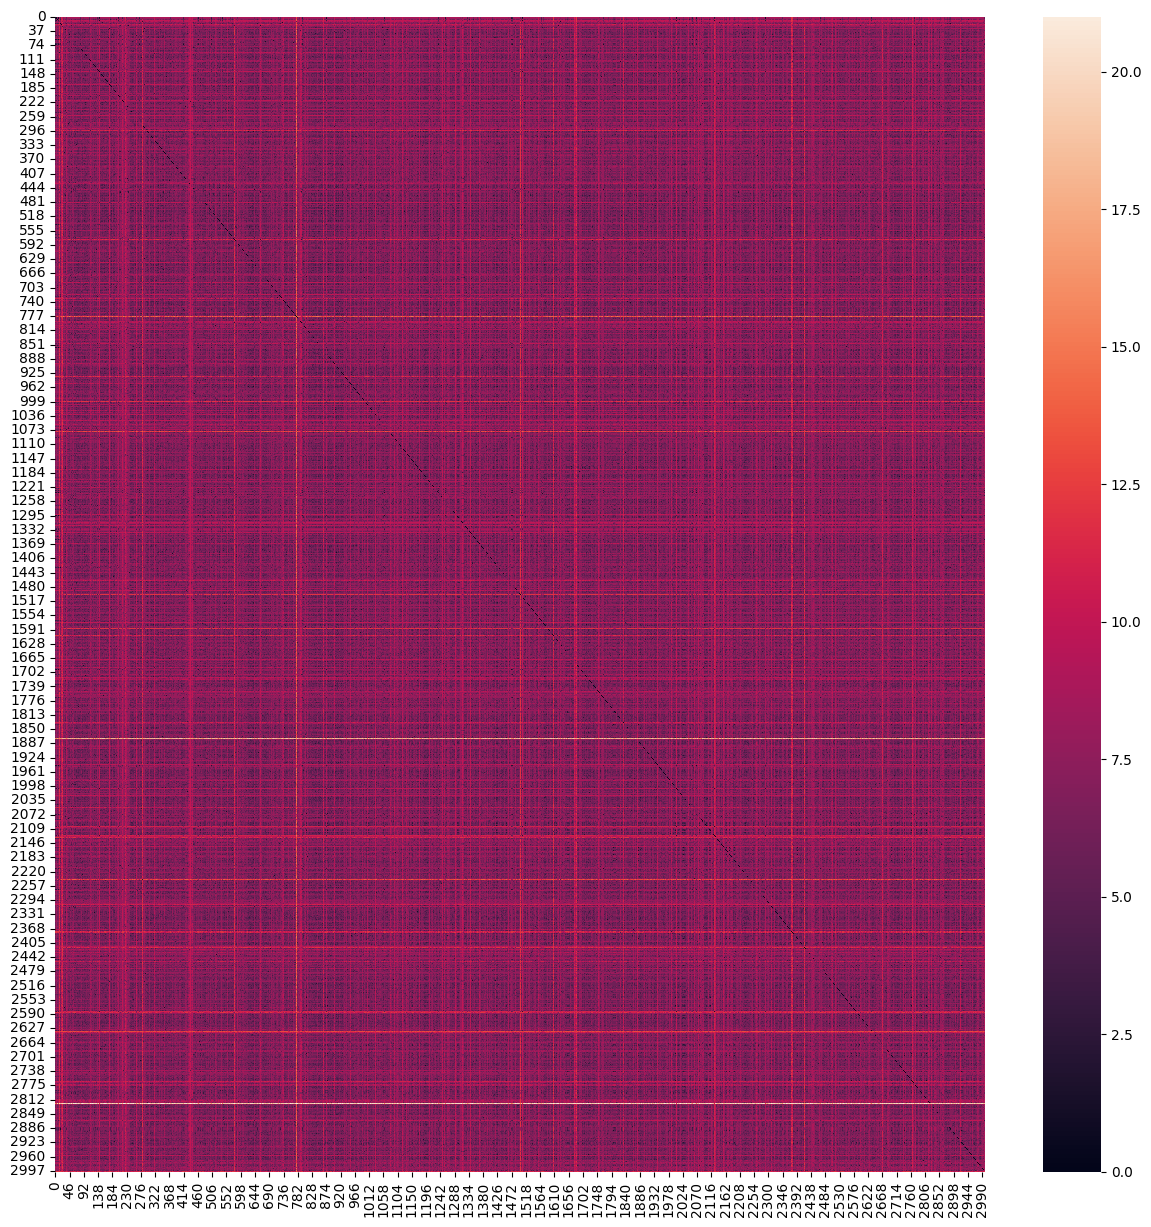

In [11]:
import seaborn as sb

plt.figure(figsize=(15, 15))
sb.heatmap(X)

**Task 2.2 [1.5 point]** First algorithm we'll use is `DBSCAN`.

We have to adjust two parameters:
- `eps`
- `min_samples`

Grid-search these two parameters and report number and sizes of output clusters for every pair of parameters. 

**Note**: to define an appropriate space for each parameter remember what they mean and how they affect DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

Example:

In [14]:
eps = 3.0
min_samples = 3

db = DBSCAN(metric="precomputed", min_samples=min_samples, eps=eps).fit(X)
labels = db.labels_
len(set(labels))
print(words[labels == 5])

[['univers2l']
 ['universal']
 ['universe']]


In [15]:
len(labels[labels == -1])

366

In [16]:
X.max()

21.0

In [17]:
dbscan = DBSCAN(metric="precomputed")
db_grid = {
    "eps": np.arange(1, 6, 1),
    "min_samples": np.arange(1, 15, 1)
}

In [18]:
grid_search = []
for i in db_grid["eps"]:
    gs_str = []
    for j in db_grid["min_samples"]:
        cl_j = dict()
        db = DBSCAN(metric="precomputed", min_samples=(j), eps=(i)).fit(X)
        labels = db.labels_
        cl_j.update({"clusters num": len(set(labels))})
        cl_j.update({-1: len(words[labels == -1])})
        for k in range(len(set(labels)) - 1):
            cl_j.update({k: len(words[labels == k])})
        gs_str.append(cl_j)
    grid_search.append(gs_str)

In [19]:
print(grid_search[2][2])

{'clusters num': 7, -1: 366, 0: 2613, 1: 3, 2: 8, 3: 4, 4: 3, 5: 3}


**Task 2.3 [1 point]** Choose a set of parameters that leads to 20-25 clusters.

- Is there a cluster that is significantly larger than the others? 
- How would you describe these clusters, what kind of passwords they contain? 

Use small samples from each cluster and try to describe a relevant password pattern.

In [20]:
params = []

In [21]:
for i in range(len(grid_search)):
    for j in range(len(grid_search[0])):
        if 20 <= (grid_search[i][j])["clusters num"] and (grid_search[i][j])["clusters num"] <= 25:
            params.append({"eps": i+1, "min_samples": j+1})

In [22]:
print(params)

[{'eps': 1, 'min_samples': 5}]


In [23]:
print(grid_search[0][4])

{'clusters num': 22, -1: 2738, 0: 76, 1: 16, 2: 12, 3: 15, 4: 4, 5: 5, 6: 5, 7: 7, 8: 8, 9: 6, 10: 9, 11: 6, 12: 5, 13: 5, 14: 5, 15: 5, 16: 14, 17: 19, 18: 8, 19: 5, 20: 27}


As we can see, most of the objects fell into the `-1` cluster, which means that they were not classified. Another clusters have not so different number of elements: from 5 to 15, but cluster `0` has 76 elements 

In [24]:
db = DBSCAN(metric="precomputed", min_samples=5, eps=1).fit(X)
labels = db.labels_

In [25]:
pass_22 = []
for i in range(21):
    pass_22.append(words[labels == i])

In [26]:
for i in range(21):
    print("Cluster", i)
    for passp in pass_22[i][0:5]:
        print(passp[0], end='  ')
    print('\n')

Cluster 0
123456  123456789  12345678  12345  1234  

Cluster 1
password  password1  Password  passw0rd  Password1  

Cluster 2
qwerty  qwerty1  qwertyui  qwerty12  qwert  

Cluster 3
123  0000  111  100  2000  

Cluster 4
qwerty123  qwert123  qwerty1234  Qwerty123  

Cluster 5
dragon  dragon1  dragons  dragoon  Dragon  

Cluster 6
987654321  0987654321  87654321  9876543210  98765432  

Cluster 7
monkey  money  monkey1  donkey  money1  

Cluster 8
michael  michael1  michele  michel  michal  

Cluster 9
daniel  danielle  daniela  daniel1  Daniel  

Cluster 10
andrew  andrea  audrey  andreas  andrei  

Cluster 11
tigger  tiger  nigger  tigger1  digger  

Cluster 12
justin  austin  justine  dustin  justin1  

Cluster 13
cookie  cookies  pookie  mookie  cookie1  

Cluster 14
angel  angels  angela  angelo  angel1  

Cluster 15
harley  marley  harvey  hailey  hayley  

Cluster 16
marina  marine  maria  martina  karina  

Cluster 17
p  n  i  m  2  

Cluster 18
mar  car  mark  dan  max  

Clu

There are two types of clusters here:
- The first - contain passwords as a variation of some number with a little more digits or a little less digits;
- The second contains a variation of the password near the common word, letters or numbers are added or removed, the register of individual letters is changed.

**Task 2.4 [1 point]** 

Let's try to improve clustering by introducing a custome levenshtein distance. You might have noticed that there are some specific password generation patterns, like `qwerty -> qwerty123`.

Classic levenshtein distance for these two passwords is 3. Try to define a custom levenshtein distance that would make these passwords closer.

Feel free to experiment and create as complex levenshtein distance as you would like.

Report new clustering, describe new clusters.


In [331]:
!pip3 install -U strsimpy

Example:

In [332]:
from strsimpy.weighted_levenshtein import WeightedLevenshtein


def insertion_cost(char):
    return 1.0


def deletion_cost(char):
    return 1.0


def substitution_cost(char_a, char_b):
    if (char_a, char_b) == ('t', 'r') or (char_a, char_b) == ('r', 't'):
        return 0.5
    return 1.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [333]:
print(levenshtein('Stting1', 'String1'))
print(weighted_levenshtein.distance('Stting1', 'String1'))

1
0.5


Let's consider passwords with the same character set but in different register as the same. We will also reduce the cost of deleting and insertion characters, which will reduce the distance between passwords that differ in a couple of assigned characters

In [334]:
def insertion_cost(char):
    return 0.5


def deletion_cost(char):
    return 0.5


def substitution_cost(char_a, char_b):
    a = char_a.lower()
    b = char_b.lower()

    if a == b:
        return 0
    else:
        return 1
    

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [335]:
print(levenshtein('DraFft', 'draft123'))
print(weighted_levenshtein.distance('DraFft', 'draft123'))

5
2.0


In [338]:
X_wl = np.zeros((words.shape[0], words.shape[0]))

for i in range(len(words)):
    for j in range(len(words)):
        X_wl[i][j] = weighted_levenshtein.distance(words[i][0], words[j][0])

In [342]:
print(X_wl)

[[ 0.   1.5  7.  ...  1.5  7.5  9. ]
 [ 1.5  0.   8.5 ...  3.   9.  10.5]
 [ 7.   8.5  0.  ...  8.5  6.5  9. ]
 ...
 [ 1.5  3.   8.5 ...  0.   8.   9.5]
 [ 7.5  9.   6.5 ...  8.   0.   8.5]
 [ 9.  10.5  9.  ...  9.5  8.5  0. ]]


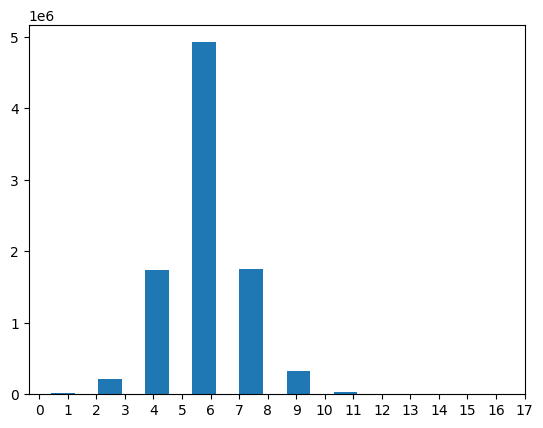

In [343]:
plt.hist(X_wl.reshape(-1), rwidth=0.5)
plt.xticks(np.arange(0, X_wl.max() + 1))
plt.show()

As we can see, the most frequent distance between words has decreased

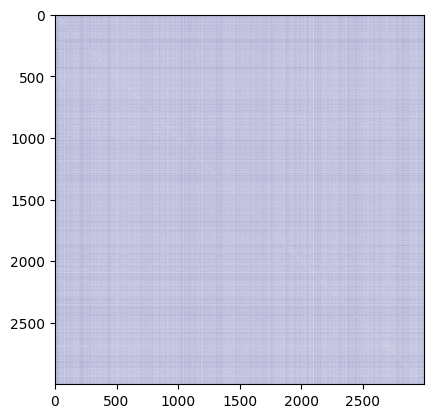

In [344]:
plt.imshow(X_wl, cmap="Purples")
plt.show()

<AxesSubplot:>

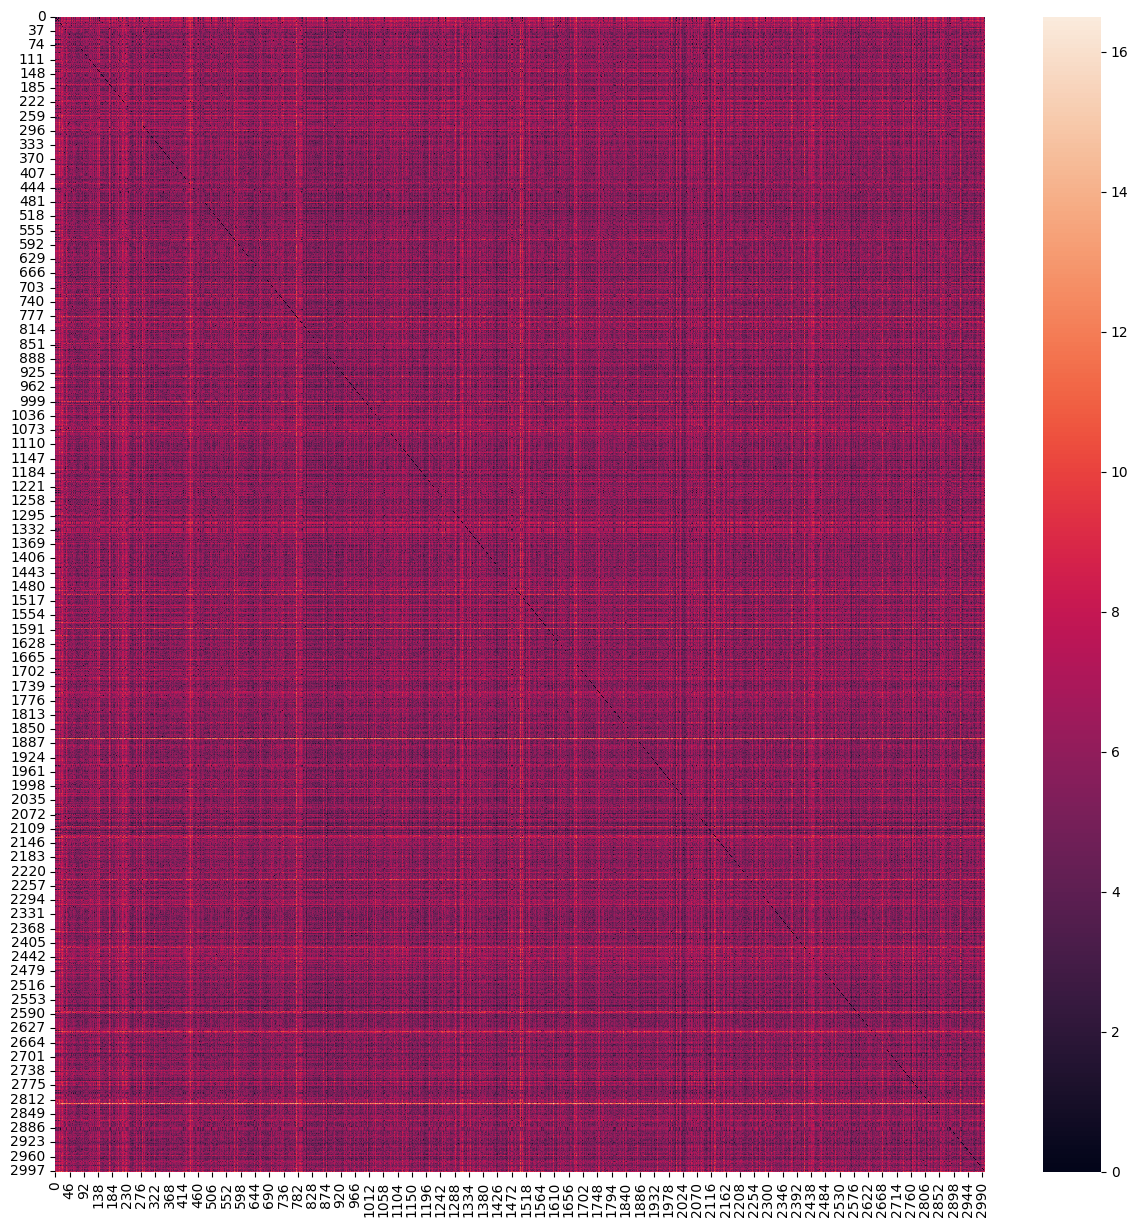

In [345]:
import seaborn as sb

plt.figure(figsize=(15, 15))
sb.heatmap(X_wl)

In [346]:
dbscan_wl = DBSCAN(metric="precomputed")
db_grid_wl = {
    "eps": np.arange(1, 6, 1),
    "min_samples": np.arange(1, 15, 1)
}

In [367]:
grid_search_wl = []
for i in db_grid_wl["eps"]:
    gs_str = []
    for j in db_grid_wl["min_samples"]:
        cl_j = dict()
        db = DBSCAN(metric="precomputed", min_samples=(j), eps=(i)).fit(X_wl)
        labels = db.labels_
        cl_j.update({"clusters num": len(set(labels))})
        cl_j.update({-1: len(words[labels == -1])})
        for k in range(len(set(labels)) - 1):
            cl_j.update({k: len(words[labels == k])})
        gs_str.append(cl_j)
    grid_search_wl.append(gs_str)

In [369]:
params_wl = []

In [370]:
for i in range(len(grid_search_wl)):
    for j in range(len(grid_search_wl[0])):
        if 20 <= (grid_search_wl[i][j])["clusters num"] and (grid_search_wl[i][j])["clusters num"] <= 25:
            params_wl.append({"eps": i+1, "min_samples": j+1})

In [371]:
print(params_wl)

[{'eps': 1, 'min_samples': 6}]


In [372]:
print(grid_search_wl[0][5])

{'clusters num': 21, -1: 2522, 0: 300, 1: 23, 2: 26, 3: 7, 4: 7, 5: 8, 6: 11, 7: 9, 8: 11, 9: 9, 10: 8, 11: 6, 12: 8, 13: 6, 14: 8, 15: 6, 16: 6, 17: 7, 18: 6, 19: 6}


In [373]:
db_wl = DBSCAN(metric="precomputed", min_samples=6, eps=1).fit(X_wl)
labels_wl = db_wl.labels_

In [380]:
pass_21 = []
for i in range(20):
    pass_21.append(words[labels_wl == i])

In [381]:
for i in range(20):
    print("Cluster", i)
    for passp in pass_21[i][0:5]:
        print(passp[0], end='  ')
    print('\n')

Cluster 0
123456  123456789  12345678  12345  123123  

Cluster 1
password  password1  Password  passw0rd  Password1  

Cluster 2
qwerty  qwertyuiop  qwerty123  qwe123  qwer1234  

Cluster 3
iloveyou  iloveu  loveyou  iloveyou1  iloveyou2  

Cluster 4
dragon  dragon1  dragons  dragon123  dragon12  

Cluster 5
654321  987654321  987654  0987654321  87654321  

Cluster 6
michael  michelle  michael1  michelle1  michele  

Cluster 7
daniel  danielle  daniela  daniel1  daniel123  

Cluster 8
andrew  andrea  sandra  audrey  andreas  

Cluster 9
tigger  tigers  tiger  nigger  tiger1  

Cluster 10
lovely  love  loveme  lovers  mylove  

Cluster 11
harley  marley  harvey  charly  hailey  

Cluster 12
angel  angels  angela  angelo  angel1  

Cluster 13
abcdef  abcdefg  abcdefgh  abcd  abcde  

Cluster 14
mama  madmax  maxmax  mamama  yomama  

Cluster 15
123321  12344321  123454321  1234321  123321q  

Cluster 16
test  esther  jester  tester  lester  

Cluster 17
sakura  sarah  star  sairam  sar

As a result, the number of misclassified elements has decreased, but is still large, the increase is most noticeable in 0 cluster

**Number of clusters from 10 to 15**

In [384]:
params_wl = []

In [385]:
for i in range(len(grid_search_wl)):
    for j in range(len(grid_search_wl[0])):
        if 10 <= (grid_search_wl[i][j])["clusters num"] and (grid_search_wl[i][j])["clusters num"] <= 15:
            params_wl.append({"eps": i+1, "min_samples": j+1})

In [386]:
print(params_wl)

[{'eps': 1, 'min_samples': 8}]


In [387]:
print(grid_search_wl[0][7])

{'clusters num': 11, -1: 2675, 0: 219, 1: 20, 2: 25, 3: 8, 4: 10, 5: 8, 6: 9, 7: 11, 8: 8, 9: 7}


In [388]:
db_wl = DBSCAN(metric="precomputed", min_samples=8, eps=1).fit(X_wl)
labels_wl = db_wl.labels_

In [389]:
pass_11 = []
for i in range(10):
    pass_11.append(words[labels_wl == i])

In [390]:
for i in range(10):
    print("Cluster", i)
    for passp in pass_11[i][0:5]:
        print(passp[0], end='  ')
    print('\n')

Cluster 0
123456  123456789  12345678  12345  1234  

Cluster 1
password  password1  Password  passw0rd  Password1  

Cluster 2
qwerty  qwerty123  qwe123  qwer1234  qwerty1  

Cluster 3
monkey  smokey  money  monkey1  donkey  

Cluster 4
michael  michelle  michael1  michele  mitchell  

Cluster 5
tigger  tigers  tiger  nigger  tiger1  

Cluster 6
lovely  love  iloveu  loveme  lovers  

Cluster 7
andrew  andrea  sandra  audrey  andreas  

Cluster 8
mama  madmax  maxmax  mamama  yomama  

Cluster 9
sakura  sarah  star  sairam  sara  



The result is similar to the previous one, there are more misclassified, but still less than when using the classical levenshtein distance

In [27]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

from collections import Counter

Compute dendrogram:

As there are too much data, we will compute it on 1/3 part of the passwords

In [28]:
condensed_X = pdist(X[0:1000][0:1000])
linkage = hierarchy.linkage(condensed_X, "single")

Plot it:

In [29]:
plt.figure(figsize=(100, 100))
dn = hierarchy.dendrogram(linkage)

Compute clusters:

In [35]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage = 'average')
labels = cluster.fit_predict(X)

Describe them in any form:

In [36]:
print(labels)

[0 0 0 ... 0 0 0]


In [37]:
pass_ac = []
for i in range(7):
    pass_ac.append(words[labels == i])

In [38]:
for i in range(7):
    print("Cluster", i)
    for passp in pass_ac[i][0:10]:
        print(passp[0], end='  ')
    print('\n')

Cluster 0
123456  123456789  password  qwerty  12345678  12345  123123  111111  1234  1234567890  

Cluster 1
123456789vuonggialong  

Cluster 2
Telechargement  projectsadminx  

Cluster 3
YfDbUfNjH10305070  

Cluster 4
dfg5Fhg5VGFh1  

Cluster 5
lpz93sssKqw8Q  

Cluster 6
john!20130605at1753  



Describe them in any form:

Something strange, almost all the words were written in one cluster, except for very long ones

### K-Means
This clustering algorithm doesn't work with precomputed distances, as it has to calculate centroids and measure distance from a centroid to every object.

Thus, we need to map the dataset to some vector space. How? Embeddings of course

In [39]:
import gensim.downloader

In [40]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [41]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

**Task 2.6 [1 point]** 

- Create two lists - for those passwords that can be embedded and for their embeddings correspondigly
- How many passwords have embeddings? 
- Describe the passwords that have embeddings and those that don't. Give your reasoning why these groups are formed like this.


In [54]:
word_embeddings.similar_by_word(words[2][0], topn=1)

[('passwords', 0.7746002674102783)]

In [ ]:
words_w_embeddings = [word_embeddings.similar_by_word(words[2][0], topn=1)]
embeddings = []

assert len(words_w_embeddings) = len(embeddings)

**Task 2.7 [2 point]** K-MEANS

- Run kmeans with different parameters, for every set of parameters report average in-class, out-class distance
- Remember that k-means has stochasticity, thus two algorithms with same hyperparameters can give different results
- Chose several (3-5) your favorite k-means versions, visualize clusters in 2D using PCA or TSNE
- Describe what are the clusters that kmeans can detect
- Are they different from DBSCAN? Why?

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Example:

In [ ]:
embeddings_clusters = KMeans(n_clusters=3).fit_predict(embeddings)
    

pca = PCA(n_components=2)
pca_words = pca.fit_transform(embeddings)

plt.scatter(pca_words[:, 0], pca_words[:, 1])
plt.title("UNCOLOURED passwords PCA") # YOU HAVE TO PLOT IT WITH COLORS
plt.show()

**Task 2.8 [extra points]**

Here are some ideas how to experiment:
- compare performance of algorithms with levenshtein distance and embeddings
- use algorithms that were mentioned in the lecture, but with no explanation. In this section write a brief description of an algorithm before applying it

In [ ]:
# YOUR CODE HERE